In [1]:
!pip install seaborn
!pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   --- ------------------------------------ 3.4/38.4 MB 17.3 MB/s eta 0:00:03
   --------- ------------------------------ 8.9/38.4 MB 21.3 MB/s eta 0:00:02
   --------------- ------------------------ 15.2/38.4 MB 23.4 MB/s eta 0:00:01
   --------------------- ------------------ 20.4/38.4 MB 23.4 MB/s eta 0:00:01
   -------------------------- ------------- 25.7/38.4 MB 22.9 MB/s eta 0:00:01
   ------------------------------- -------- 29.9/38.4 MB 22.6 MB/s eta 0:00:01
   ------------------------------------ --- 35.4/38.4 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.4 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.4 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.4 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.4 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------- 38.4/38.4 MB 14.8 M

In [12]:
# Load the dataset
conn = sqlite3.connect('inventory.db')

cursor = conn.cursor()

cursor.execute("PRAGMA table_info(vendor_sales_summary)")
columns_info = cursor.fetchall()

for col in columns_info:
    print(col)

# Get vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()

(0, 'VendorNumber', 'INTEGER', 0, None, 0)
(1, 'VendorName', 'TEXT', 0, None, 0)
(2, 'Brand', 'INTEGER', 0, None, 0)
(3, 'Description', 'TEXT', 0, None, 0)
(4, 'PurchasePrice', 'REAL', 0, None, 0)
(5, 'ActualPrice', 'REAL', 0, None, 0)
(6, 'Volume', 'REAL', 0, None, 0)
(7, 'TotalPurchaseQuantity', 'INTEGER', 0, None, 0)
(8, 'TotalPurchaseDollars', 'REAL', 0, None, 0)
(9, 'TotalSalesQuantity', 'REAL', 0, None, 0)
(10, 'TotalSalesDollars', 'REAL', 0, None, 0)
(11, 'TotalSalesPrice', 'REAL', 0, None, 0)
(12, 'TotalExciseTax', 'REAL', 0, None, 0)
(13, 'FreightCost', 'REAL', 0, None, 0)
(14, 'GrossProfit', 'REAL', 0, None, 0)
(15, 'ProfitMargin', 'REAL', 0, None, 0)
(16, 'StockTurnover', 'REAL', 0, None, 0)
(17, 'SalestoPurchaseRatio', 'REAL', 0, None, 0)


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
# Perform EDA on the resultant table to understand distribution of data in each column overall dataset

# Check the summary statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


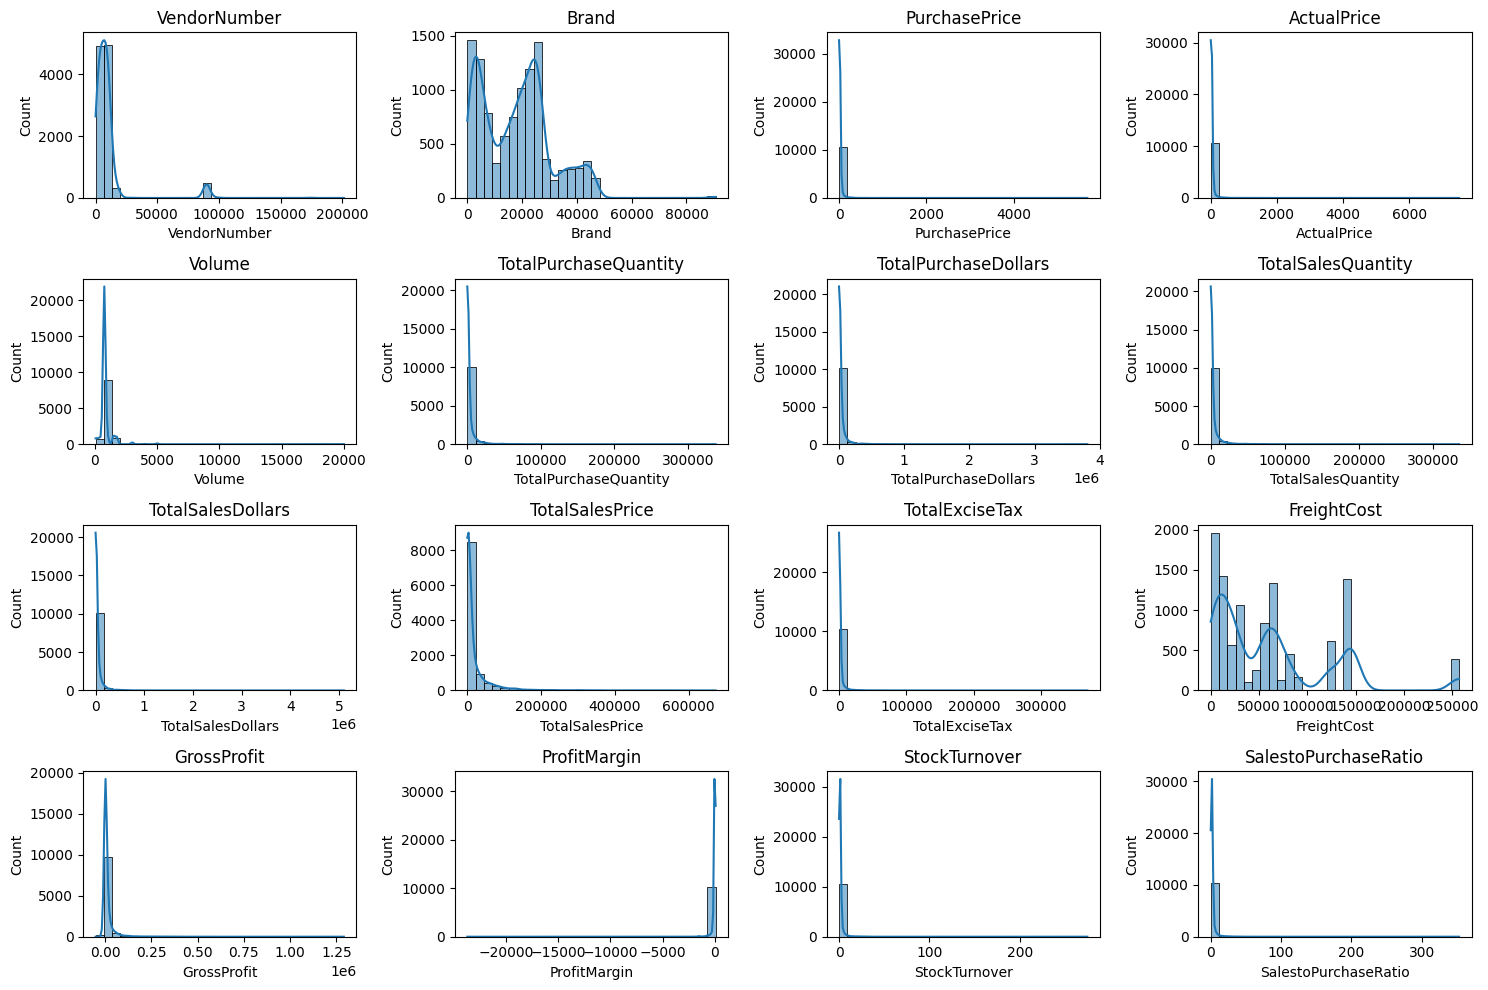

In [13]:
# Plot histogram distribution of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

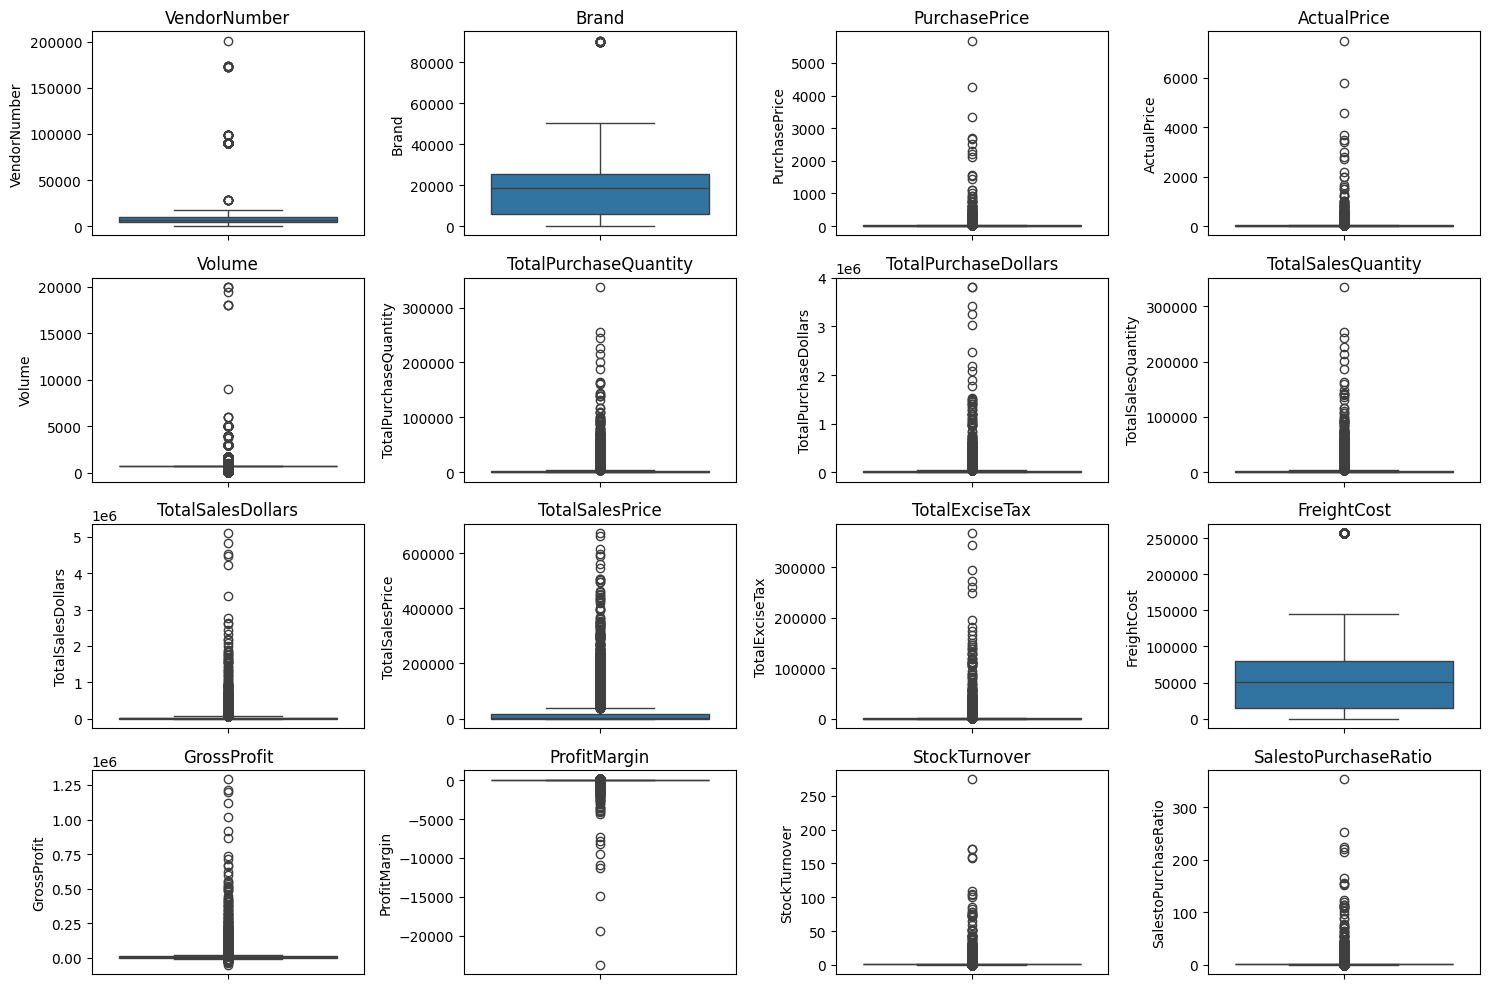

In [15]:
# Plot box plot distribution of numerical columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights:

## Negative & Zero Values:

* **Gross Profit:** Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
* **Profit Margin:** Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
* **Total Sales Quantity & Sales Dollars:** Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

## Outliers Indicated by High Standard Deviations:

* **Purchase & Actual Prices:** The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
* **Freight Cost:** Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* **Stock Turnover:** Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [16]:
# Filter the data to remove inconsistencies
pd.read_sql_query("""SELECT * FROM vendor_sales_summary WHERE GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0""", conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


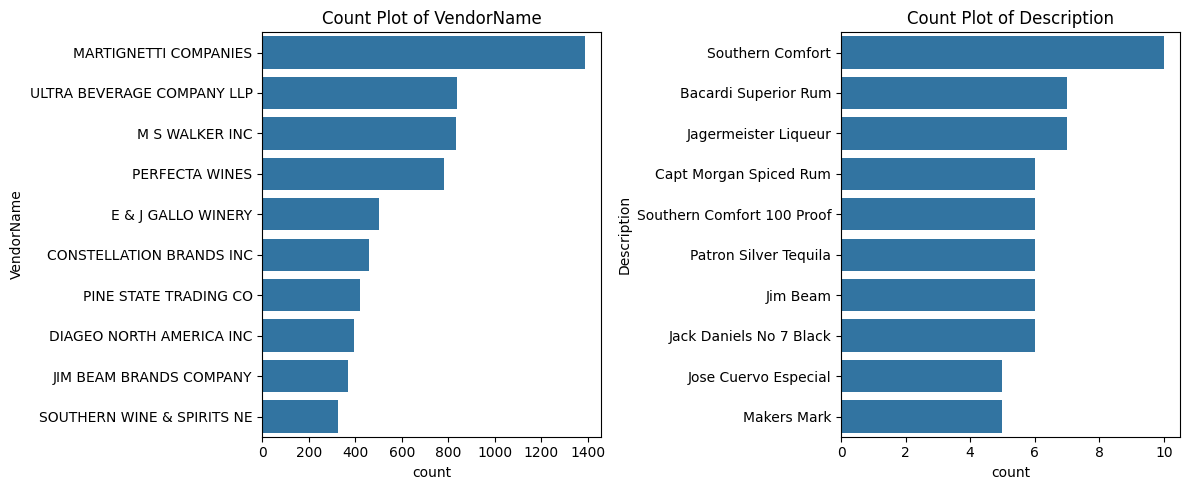

In [18]:
# Plot count plot distribution for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order = df[col].value_counts().index[:10]) # Get the top 10
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

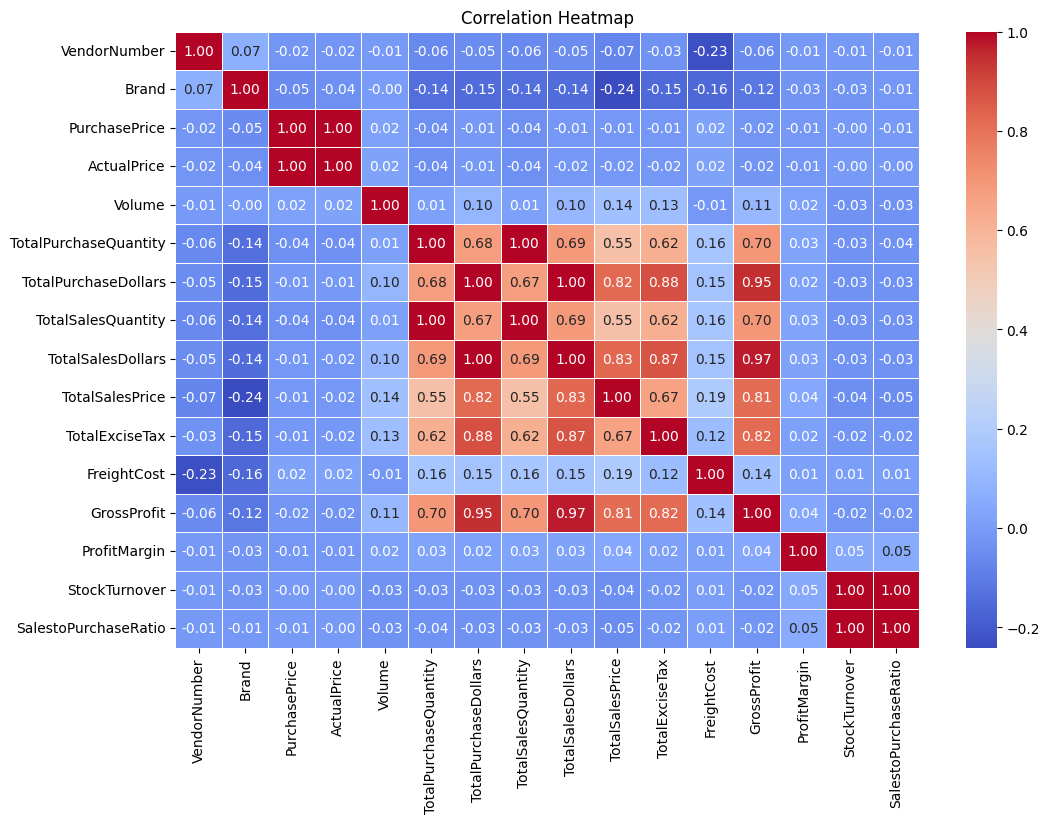

In [19]:
# Plot correlation heatmaps
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Heatmap Insights

From the correlation heatmap, we can conclude:
- PurchasePrice has weak correlations with TotalSalesDollars (-0.01) and GrossProfit (-0.02), suggesting that price variations do not significantly impact sales revenue or profit.

- Strong correlation between total purchase quantity and total sales quantity (1.00), confirming efficient inventory turnover.

- Positive correlation between profit margin & total sales price (0.04) suggests that as sales price increases, margins increase, possibly due to perceived value of brand or product.

- StockTurnover has weak negative correlations with GrossProfit (-0.02) and a positive correlation with ProfitMargin (0.05), indicating that faster stock turnover doesn't necessarily lead to more absolute dollars in gross profit, possibly due to aggressive pricing or focus on low-margin products. However, it does seem to offer a slight advantage in terms of the percentage profit earned on sales, likely by reducing inventory holding costs and ensuring fresher stock.

# Data Analysis

## 1. Identify brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margins

In [47]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollars':'sum', 'ProfitMargin':'mean'}).reset_index()

In [48]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [49]:
low_sales_threshold

np.float64(286.185)

In [50]:
high_margin_threshold

np.float64(56.198056057839054)

In [51]:
# Filter brands with low sales and high profit
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) 
    & (brand_performance['ProfitMargin'] >= high_margin_threshold)]
print("Brands with low sales and high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales and high profit margins:


,Description,TotalSalesDollars,ProfitMargin
7777,Santa Rita Organic Svgn Bl,9.99,66.466466
2896,Debauchery Pnt Nr,11.58,65.975820
2537,Concannon Glen Ellen Wh Zin,15.95,83.448276
2677,Crown Royal Apple,27.86,89.806174
7818,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
8939,Tommasi Poggio Tufo Cab Svgn,269.73,74.789604
9229,Vigne A Porrona Rosso,272.79,96.825397
3980,Gifft Chardonnay,279.80,94.245890
5736,Mad Dogs & Englishmen Jumil,279.80,97.666190


In [60]:
# Limit the data for better visualization
brand_performance=brand_performance[brand_performance['TotalSalesDollars'] < 10000]

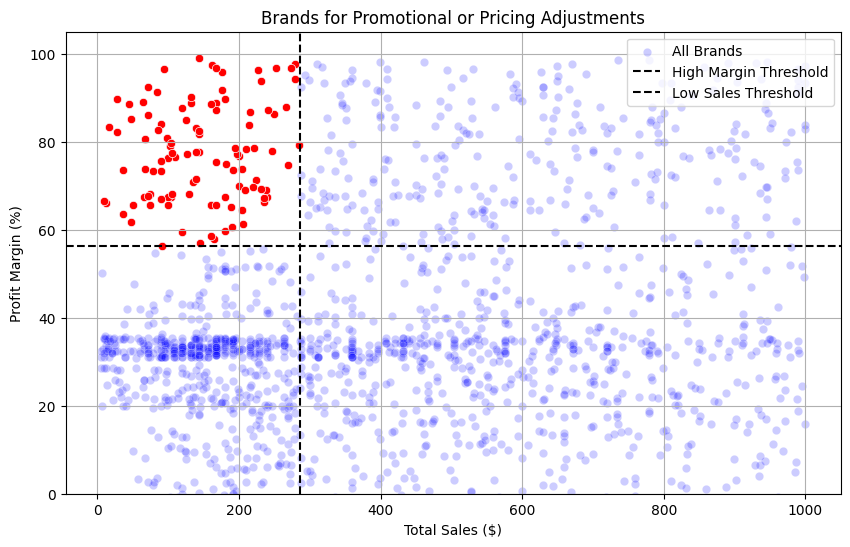

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label = 'All Brands', alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")

plt.ylim(0, 105)

plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Determine top vendors and brands by sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [64]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      68739834.97
MARTIGNETTI COMPANIES         40960117.82
PERNOD RICARD USA             32279544.17
JIM BEAM BRANDS COMPANY       31898621.16
BACARDI USA INC               25005365.79
CONSTELLATION BRANDS INC      24467134.23
E & J GALLO WINERY            18553774.66
BROWN-FORMAN CORP             18476611.60
ULTRA BEVERAGE COMPANY LLP    17802646.10
M S WALKER INC                15436066.26
Name: TotalSalesDollars, dtype: float64

In [65]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [66]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [67]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

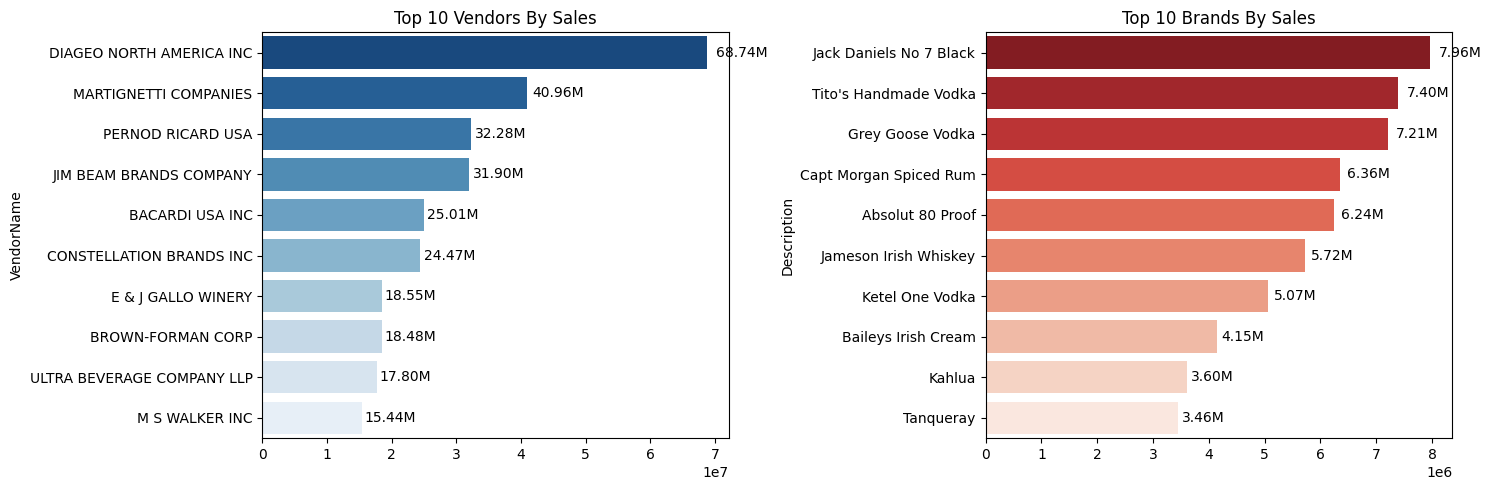

In [69]:
plt.figure(figsize=(15, 5))

# Plot the top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors By Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
    
# Plot the top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands By Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## 2. Identify vendors that contribute the most to total purchase dollars

In [73]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'TotalSalesDollars':'sum',
    'GrossProfit':'sum'
}).reset_index()

In [83]:
# Add a new column for percentage of vendor contribution
vendor_performance['PurchaseContribution'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [84]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution', ascending = False), 2)

In [85]:
# Display the top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution
28,DIAGEO NORTH AMERICA INC,50.96M,68.74M,17.78M,15.83
63,MARTIGNETTI COMPANIES,27.86M,40.96M,13.10M,8.66
50,JIM BEAM BRANDS COMPANY,24.20M,31.90M,7.70M,7.52
74,PERNOD RICARD USA,24.12M,32.28M,8.16M,7.49
8,BACARDI USA INC,17.62M,25.01M,7.38M,5.48
23,CONSTELLATION BRANDS INC,15.57M,24.47M,8.89M,4.84
14,BROWN-FORMAN CORP,13.53M,18.48M,4.95M,4.20
114,ULTRA BEVERAGE COMPANY LLP,13.21M,17.80M,4.59M,4.10
33,E & J GALLO WINERY,12.29M,18.55M,6.26M,3.82
59,M S WALKER INC,10.94M,15.44M,4.50M,3.40


In [86]:
top_vendors['CumulativeContribution%'] = top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution,CumulativeContribution%
28,DIAGEO NORTH AMERICA INC,50.96M,68.74M,17.78M,15.83,15.83
63,MARTIGNETTI COMPANIES,27.86M,40.96M,13.10M,8.66,24.49
50,JIM BEAM BRANDS COMPANY,24.20M,31.90M,7.70M,7.52,32.01
74,PERNOD RICARD USA,24.12M,32.28M,8.16M,7.49,39.50
8,BACARDI USA INC,17.62M,25.01M,7.38M,5.48,44.98
23,CONSTELLATION BRANDS INC,15.57M,24.47M,8.89M,4.84,49.82
14,BROWN-FORMAN CORP,13.53M,18.48M,4.95M,4.20,54.02
114,ULTRA BEVERAGE COMPANY LLP,13.21M,17.80M,4.59M,4.10,58.12
33,E & J GALLO WINERY,12.29M,18.55M,6.26M,3.82,61.94
59,M S WALKER INC,10.94M,15.44M,4.50M,3.40,65.34


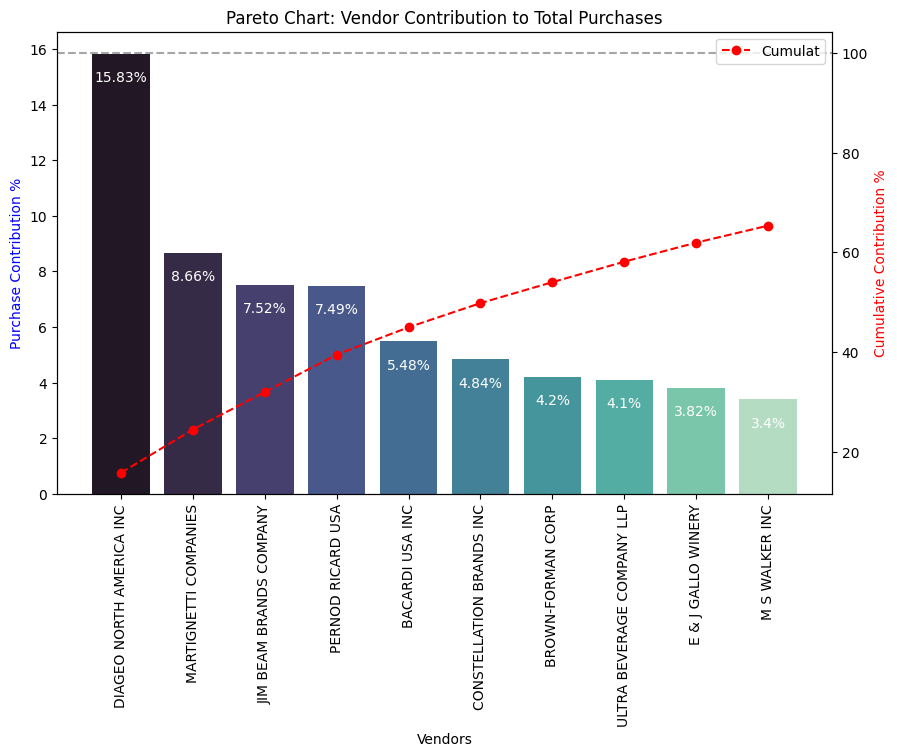

In [87]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution%'], color='red', marker='o', linestyle='dashed', label='Cumulat')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

## 3. How much of total procurement is dependent on the top vendors

In [89]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.34 %


Text(0.5, 1.0, "Top 10 Vendor's Purchase Contribution (%)")

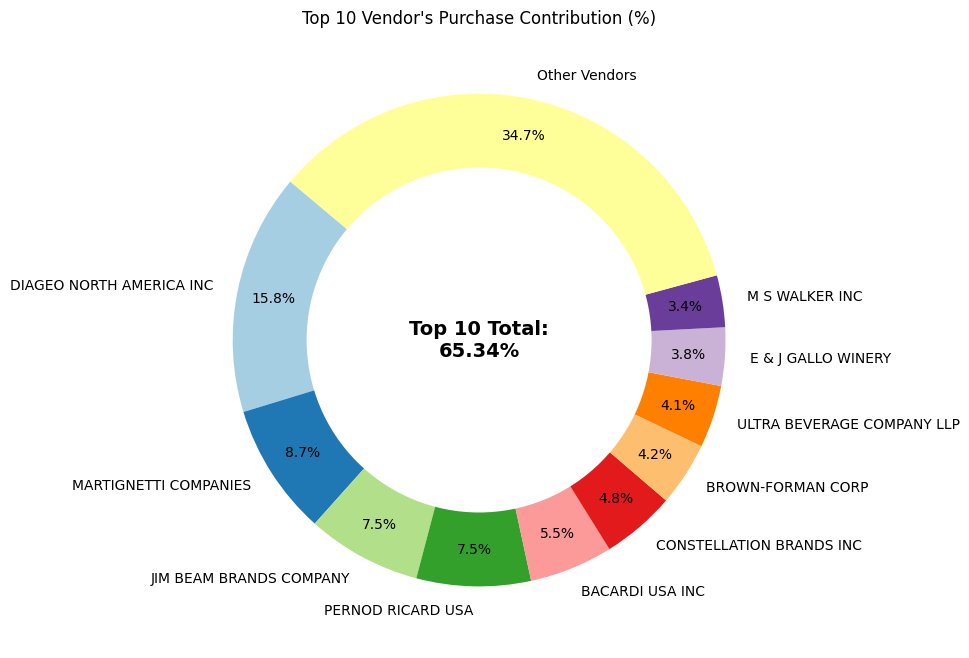

In [91]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%.1f%%',
                                 startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")

## 4. Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [92]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [93]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [94]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,43.776954
Medium,17.894005
Large,11.308807


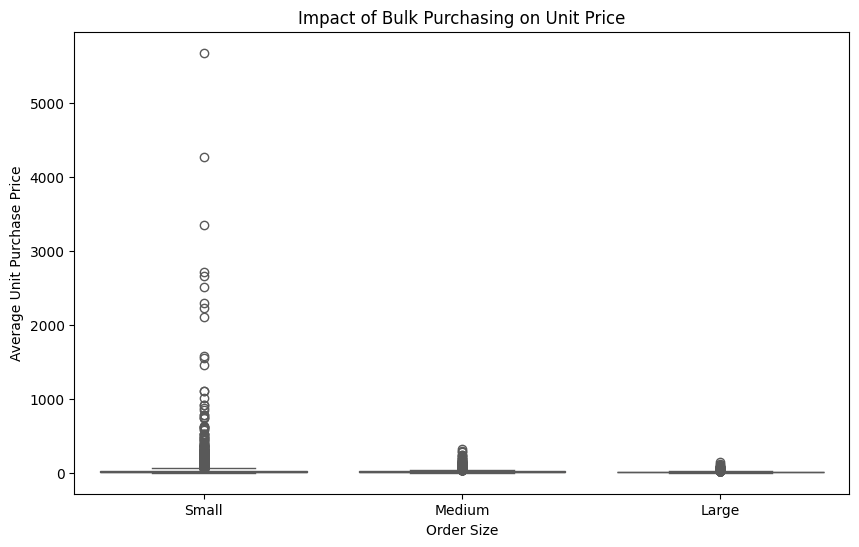

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

## 5. Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [101]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
AAPER ALCOHOL & CHEMICAL CO,0.000000
LAUREATE IMPORTS CO,0.000000
TRUETT HURST,0.041667
"IRA GOLDMAN AND WILLIAMS, LLP",0.075000
HIGHLAND WINE MERCHANTS LLC,0.148920
UNCORKED,0.217238
MILTONS DISTRIBUTING CO,0.236111
VINEYARD BRANDS LLC,0.256241
LOYAL DOG WINERY,0.308333


## 6. How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [102]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 8.75M


In [103]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
28,DIAGEO NORTH AMERICA INC,980.09K
63,MARTIGNETTI COMPANIES,928.99K
50,JIM BEAM BRANDS COMPANY,857.80K
114,ULTRA BEVERAGE COMPANY LLP,780.27K
73,PERFECTA WINES,571.81K
74,PERNOD RICARD USA,554.74K
59,M S WALKER INC,469.96K
125,WILLIAM GRANT & SONS INC,436.49K
33,E & J GALLO WINERY,315.20K
14,BROWN-FORMAN CORP,284.91K


## 7. What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [115]:
df = df[np.isfinite(df["ProfitMargin"])].copy()
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [117]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [118]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (29.49, 30.52), Mean: 30.00
Low Vendors 95% CI: (-169.44, -102.50), Mean: -135.97


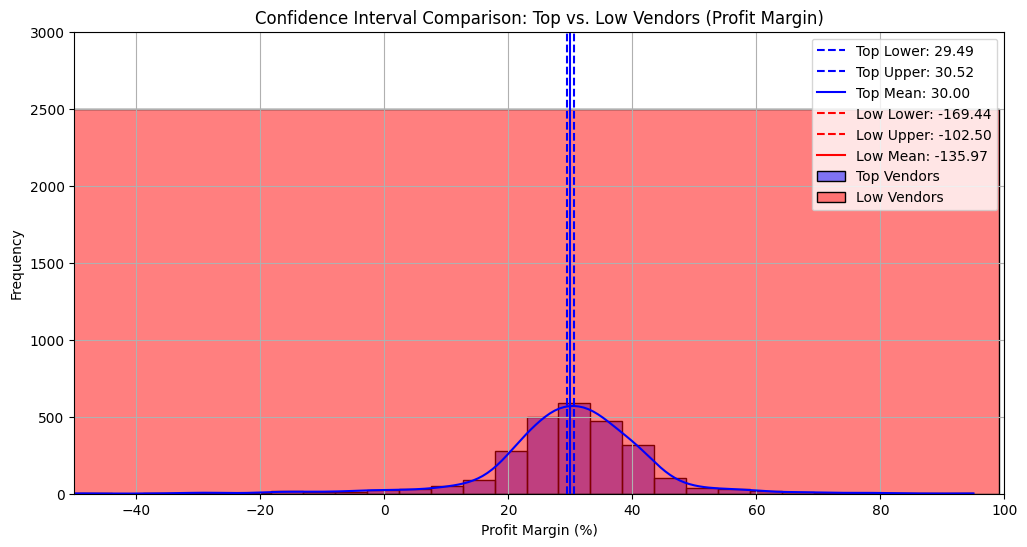

In [122]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.xlim(-50, 100)
plt.ylim(0, 3000)
plt.grid(True)
plt.show()

The 95% confidence interval for top-performing vendors' profit margins is between 29.49% and 30.52%, with a mean of 30.00%. This indicates consistently healthy and positive profit margins for these vendors.

The 95% confidence interval for low-performing vendors' profit margins is significantly negative, ranging from -169.44% to -102.50%, with a mean of -135.97%. This suggests that these vendors are experiencing substantial and consistent losses.

There is a stark contrast in profitability between top-performing and low-performing vendors, with the latter group operating at a considerable loss.

Further investigation into the cost structures, pricing strategies, and operational efficiencies of low-performing vendors is crucial to address their severe unprofitability.

## Hypothesis Testing

## Is there a significant difference in profit margins between top-performing and low-performing vendors?

In [125]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")

T-Statistic: 9.7222, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low-performing vendors.
